In [1]:
import sys
sys.path.append('/home/cara/Documents/reddit_analysis_code')
import numpy as np
import pandas as pd
from reddit_dataclass import RedditData as reddit
import pickle
import matplotlib.pyplot as plt

In [2]:
# first perform sentiment analysis using sentiment_analysis.py

In [3]:
sentiment_datasets = pickle.load(open('sentiment_5_datasets.p', 'rb'))

In [4]:
sentiment_datasets.keys()

dict_keys(['books', 'conspiracy', 'crypto', 'thedonald', 'politics'])

In [5]:
datasets_author_counts = {}
for key in sentiment_datasets:
    datasets_author_counts[key] = sentiment_datasets[key].group_by_col('author')

In [24]:
import matplotlib.pyplot as plt

SMALL_SIZE = 18
MEDIUM_SIZE = 24
BIGGER_SIZE = 28

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels

plt.rc('axes', titlelocation='left')

In [25]:
title_map = {
    'crypto': '(b) r/CryptoCurrency',
    'conspiracy': '(a) r/Conspiracy',
    'politics': '(c) r/politics',
    'books': '(d) r/books',
}
ylabel_map = {
    'r2': 'R-squared',
    'comments': 'Comments',
    'posts': 'Posts',
}
xlabel = 'Sentiment Score'

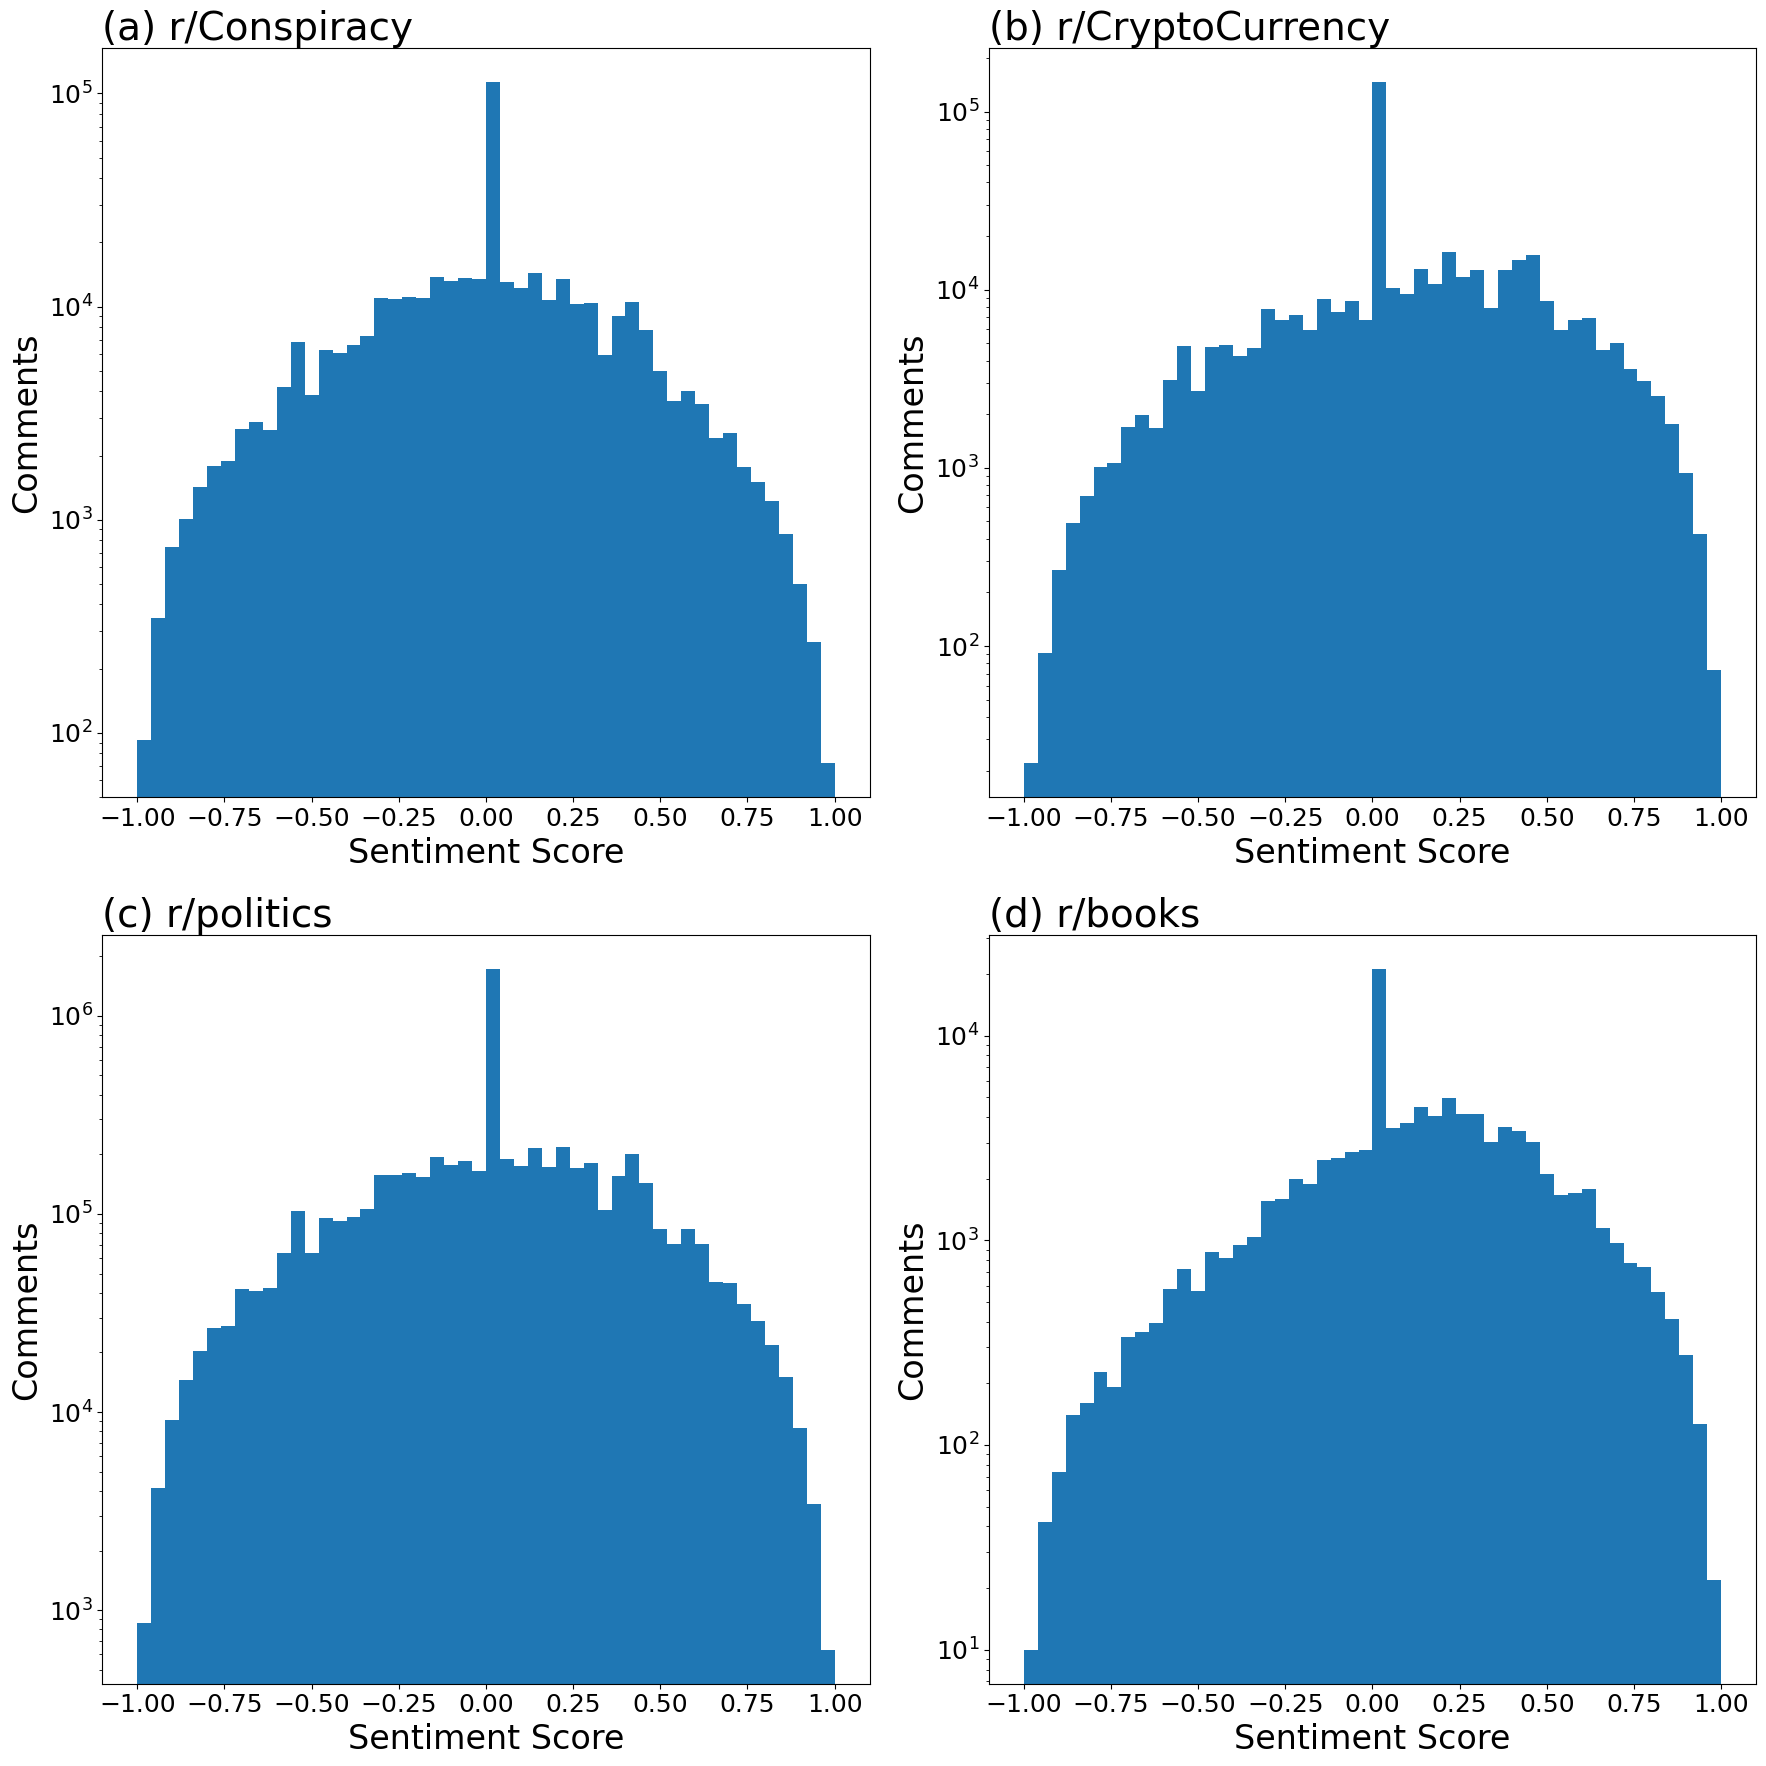

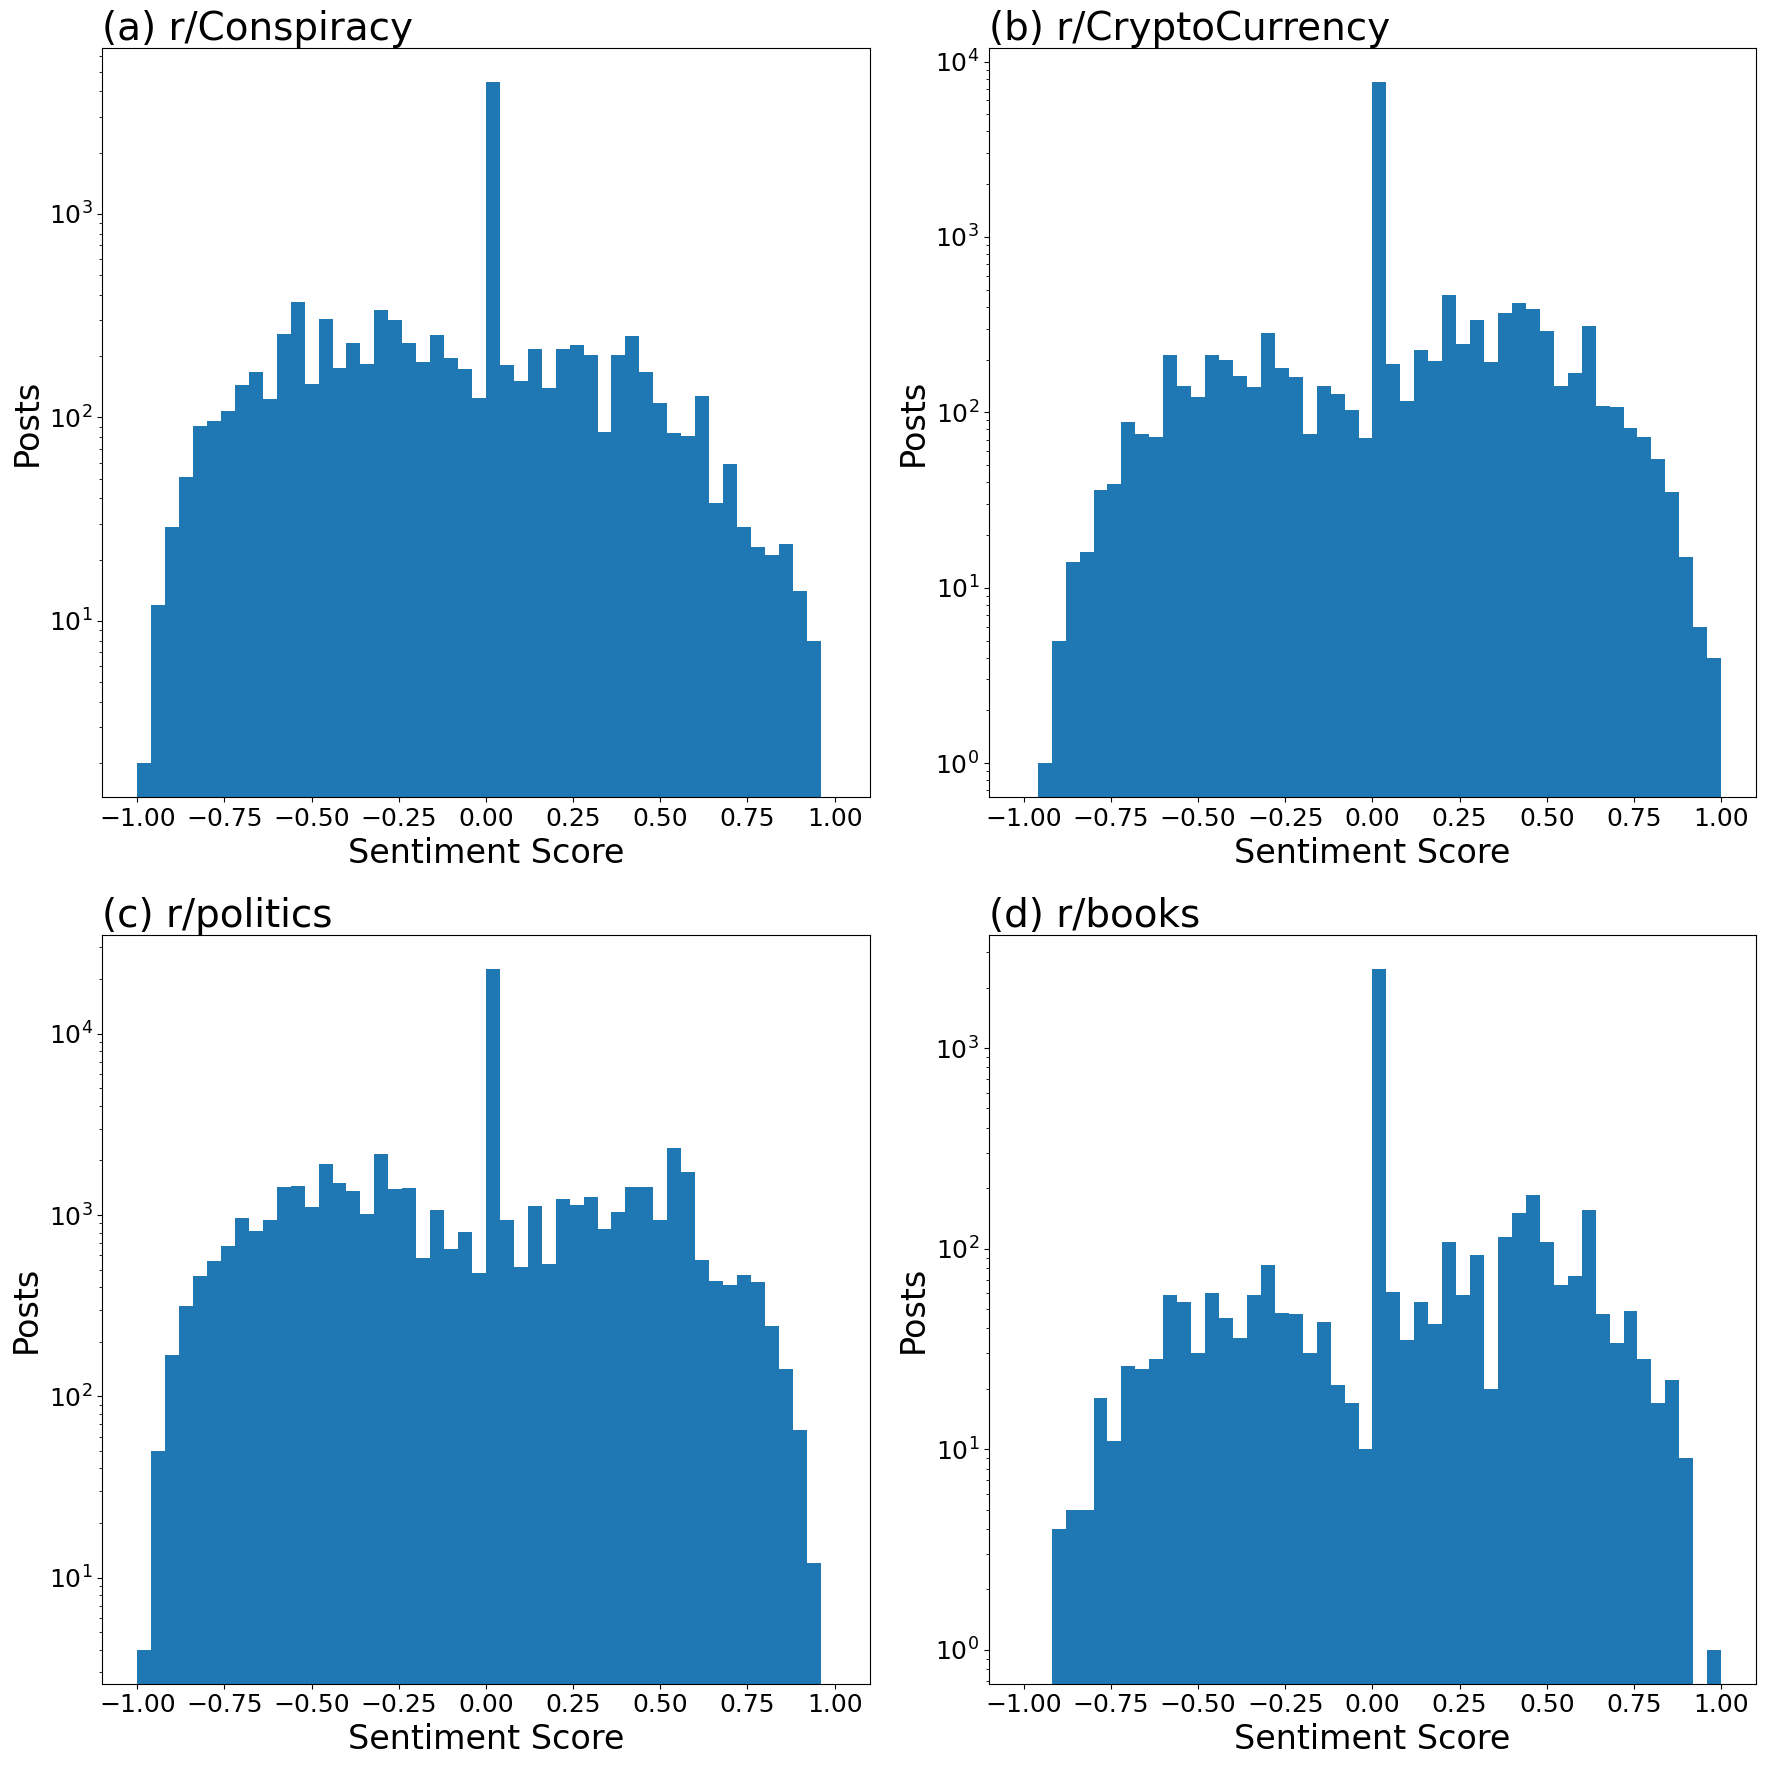

In [27]:
activity_sentiment_lookup = {
        'comments': 'body_sentiment_score',
        'posts': 'subject_sentiment_score'
    }

activities = {
    'comments': {},
    'posts': {}
}

for subreddit in ['conspiracy', 'crypto', 'politics', 'books']:
    activities['comments'][subreddit] = sentiment_datasets[subreddit].comments
    activities['posts'][subreddit] = sentiment_datasets[subreddit].posts


for activity_key in activities:
    fig, axes = plt.subplots(2, 2, figsize=(18, 18))
    i = 0
    j = 0

    for subreddit in activities[activity_key]:
        activities[activity_key][subreddit][activity_sentiment_lookup[activity_key]].hist(ax=axes[i,j], grid=False, log=True, bins=50, range=(-1, 1))
        if i != 0 and j != 0:
            axes[i,j].sharex(axes[0,0])
        axes[i, j].set_title(f"{title_map[subreddit]}")
        axes[i, j].set_xlabel(xlabel, fontsize=MEDIUM_SIZE)
        axes[i, j].set_ylabel(ylabel_map[activity_key], fontsize=MEDIUM_SIZE)
        j += 1
        if j == 2:
            j = 0
            i += 1
    
    plt.tight_layout()
    plt.show()


In [10]:
# check neutrals
folder = 'neutral_sentiment_activities'
for key in sentiment_datasets:
    sentiment_datasets[key].comments[sentiment_datasets[key].comments.body_sentiment_score == 0].to_csv(f'{folder}/{key}_comments.csv', index=False)
    sentiment_datasets[key].posts[sentiment_datasets[key].posts.subject_sentiment_score == 0].to_csv(f'{folder}/{key}_posts.csv', index=False)

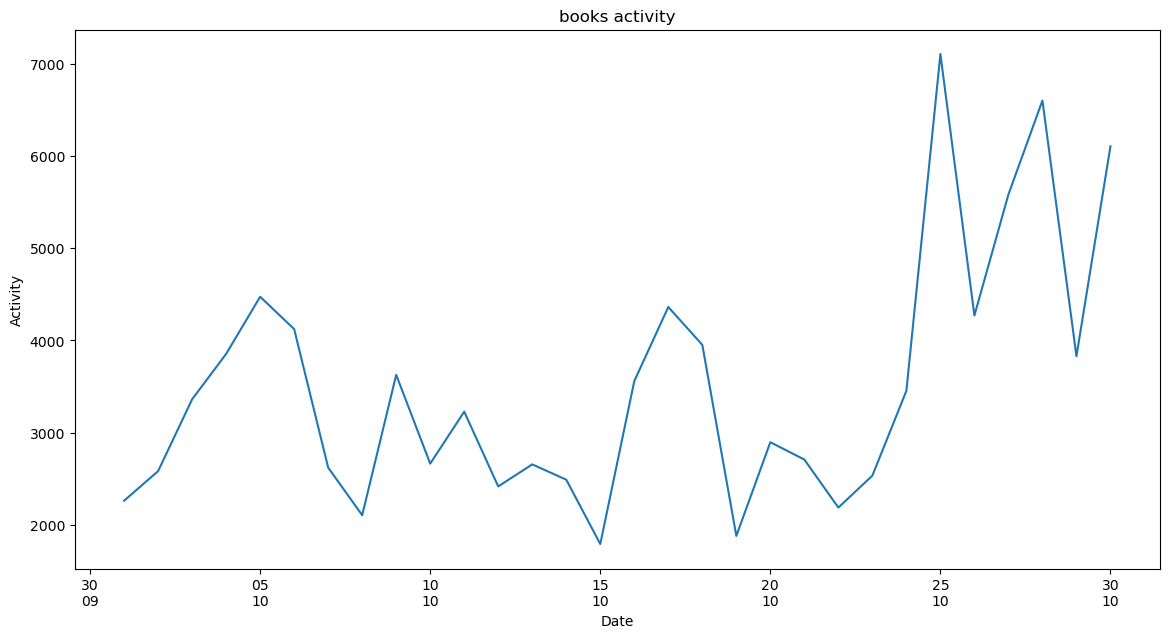

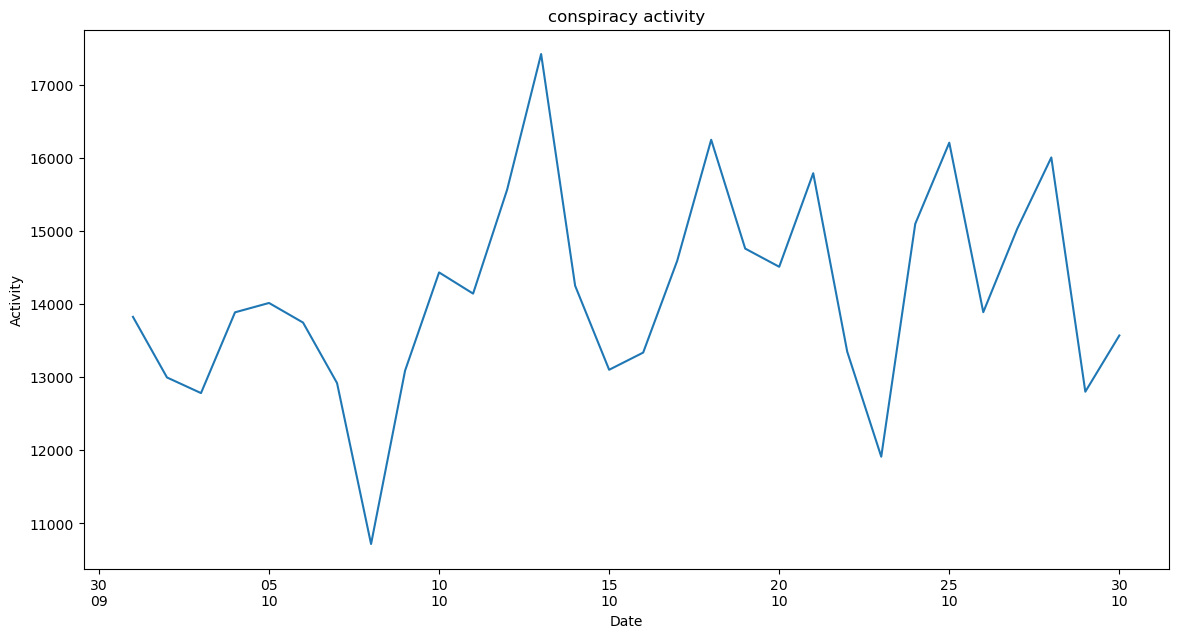

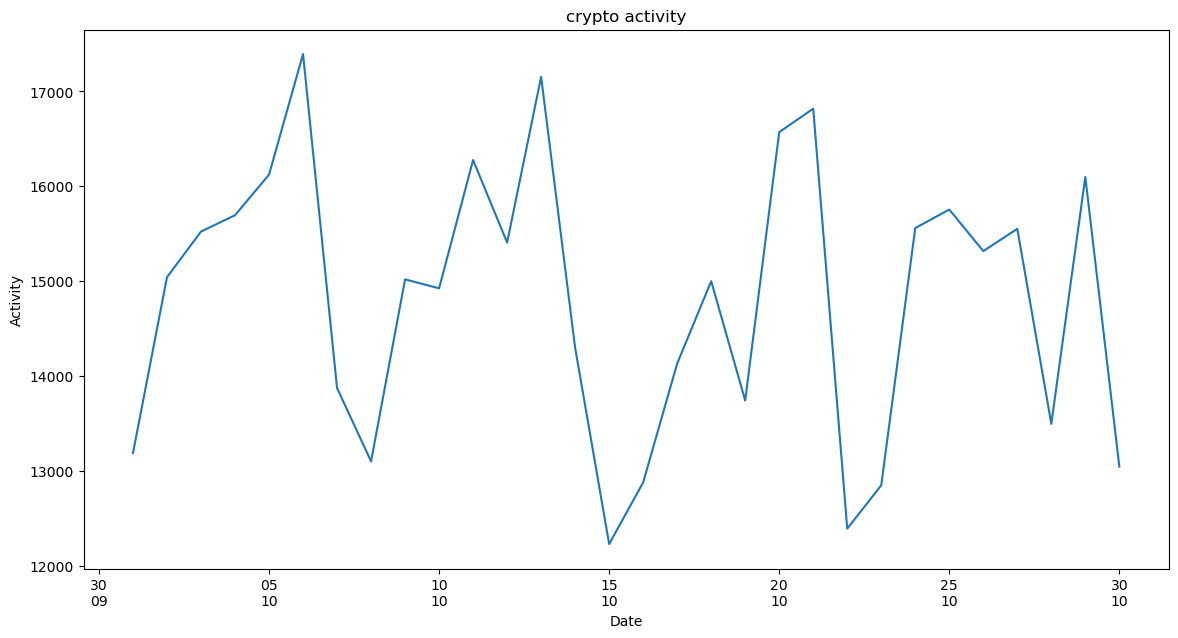

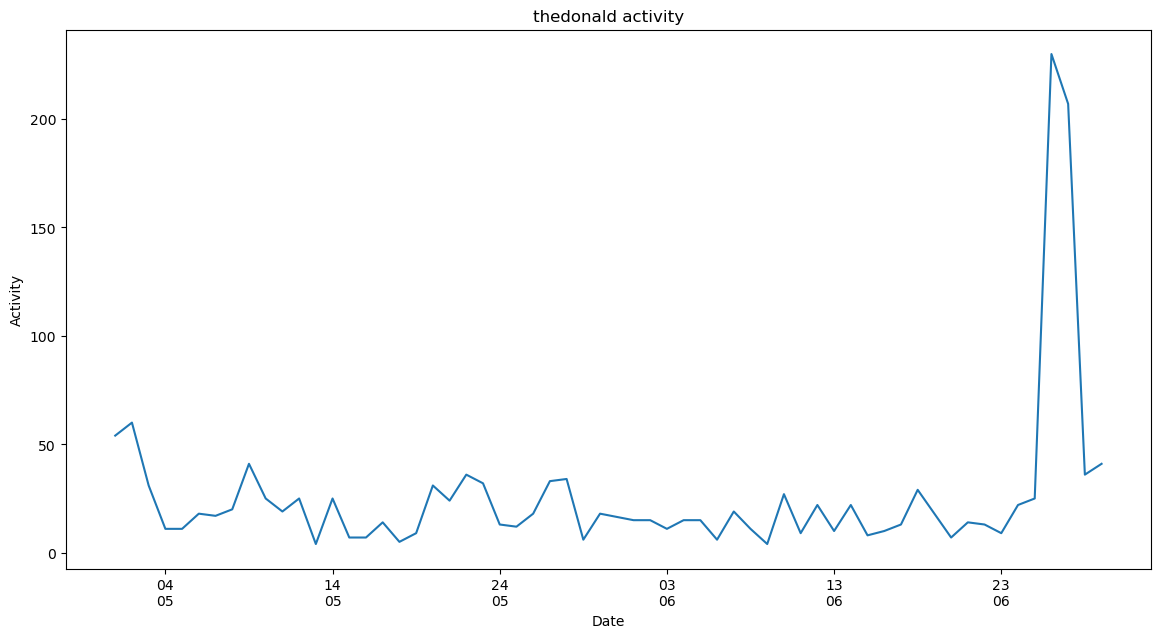

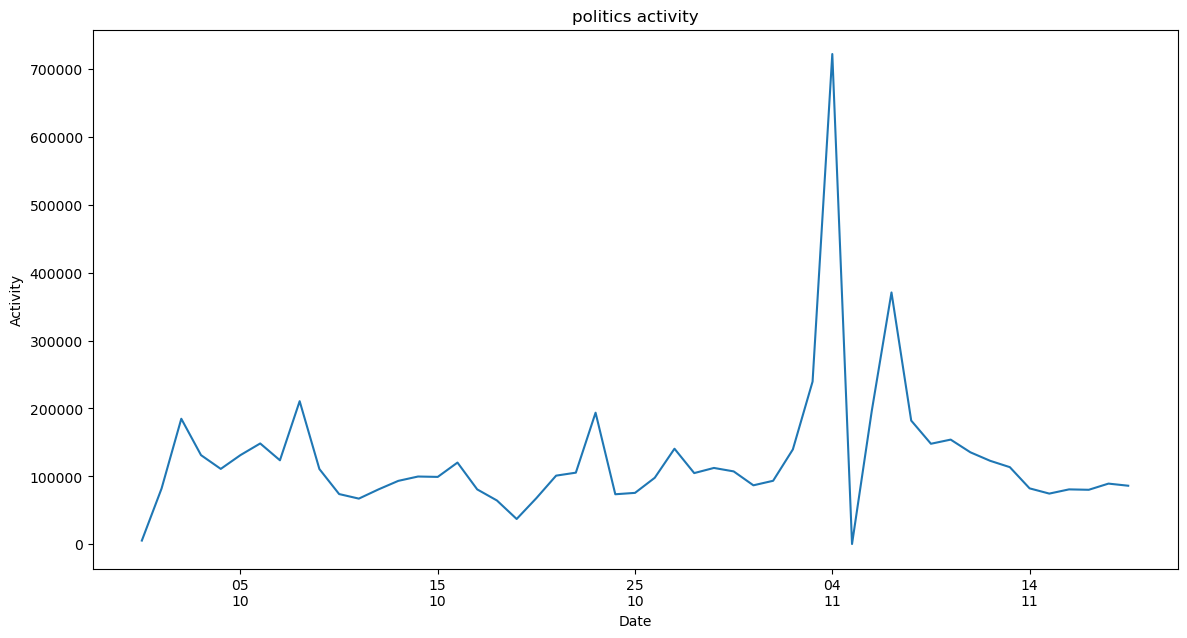

: 

In [5]:
for key in sentiment_datasets:
    activity_over_time = sentiment_datasets[key].group_by_col('date')

    fig, ax = plt.subplots(1, 1, figsize=(14,7))
    sentiment_datasets[key].plot_over_time(activity_over_time.counts, f'Activity', activity_over_time.date, ax=ax, incl_important_dates=False, title=f'{key} activity')
    plt.show()

In [ ]:
# change timezone to EDT timezone - add this to reddit_dataclass?